#### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [10]:
# titanic.csv import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
dt_clf = DecisionTreeClassifier(random_state=42)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=112)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
dt_clf.feature_importances_

array([0.01252348, 0.        , 0.60026011, 0.3872164 ])

In [12]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='file/tree.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

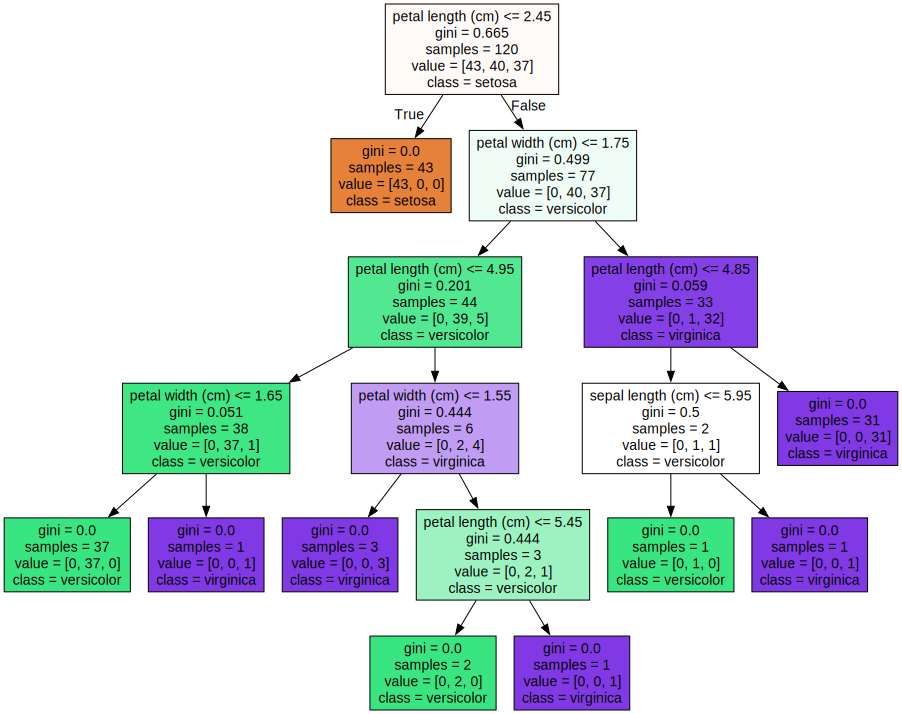

In [14]:
import graphviz
with open('file/tree.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph

In [15]:
## 이미지 저장
graph.render(filename='basic_tree_1', directory='./file/', format='png')

'file\\basic_tree_1.png'

In [16]:
# 에측 및 평가 
from sklearn.metrics import accuracy_score 

pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)


1.0

#### titanic decision Tree

In [17]:
# titanic csv import 
import pandas as pd

train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_label_df = pd.read_csv('./datasets/titanic_gender_submission.csv')

In [19]:
# feature selection

titanic_train_df = train_df[['Pclass' , 'Sex', 'Age' , 'Survived']]
titanic_test_df = test_df[['Pclass' , 'Sex', 'Age']]

In [20]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [21]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [22]:
# 결측치 처리 : Age 평균값으로 대체
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean())

In [23]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
result_train = encoder.fit_transform(titanic_train_df['Sex'])
result_test = encoder.fit_transform(titanic_test_df['Sex'])
# print(result)
titanic_train_df['Sex']=result_train
titanic_test_df['Sex']=result_test

In [26]:
features = titanic_train_df.drop('Survived', axis=1)
label = titanic_train_df['Survived']

In [27]:
# modeling

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(features ,label )

DecisionTreeClassifier(random_state=42)

In [28]:
# evaluation
y_true = test_label_df['Survived']
pred = dt_clf.predict(titanic_test_df)
accuracy_score(y_true , pred)

0.8086124401913876

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='file/titanic_tree.dot',
                class_names=['Survived' ,'Death'],
                feature_names=['Pclass' , 'Sex', 'Age'],
                impurity=True, filled=True)

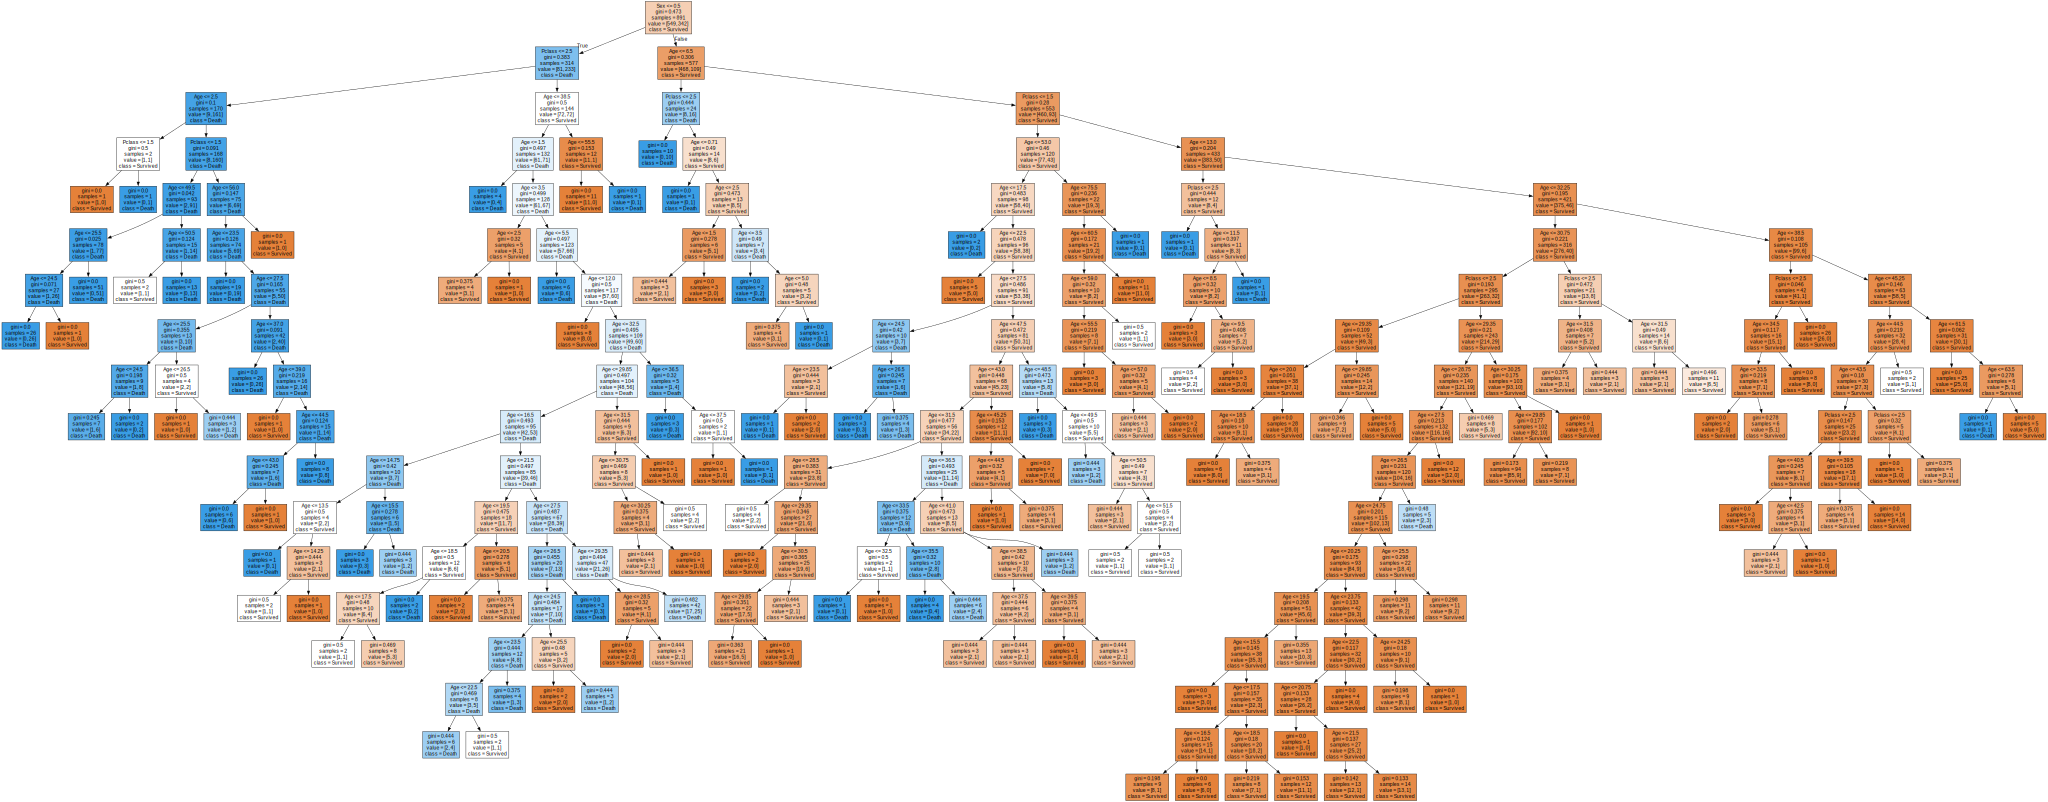

In [31]:
import graphviz
with open('file/titanic_tree.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph

In [34]:
# grisearchcv 

from sklearn.model_selection import GridSearchCV

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth' : [3, 5, 7], 'min_samples_split' : [5, 10]}

grid_dtree = GridSearchCV(dt_clf, param_grid = parameters, cv=3, refit=True)

grid_dtree.fit(features, label)                                    

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [5, 10]})

In [35]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 5}

In [36]:
pred = grid_dtree.predict(titanic_test_df)
accuracy_score(y_true, pred)

0.9832535885167464

In [37]:
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5 , random_state=42)
dt_clf.fit(features ,label )

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

In [38]:
dt_clf.feature_importances_

array([0.24593731, 0.66442647, 0.08963622])

feature importance:[0.246 0.664 0.09 ]
Pclass : 0.246
Sex : 0.664
Age : 0.090


<Axes: >

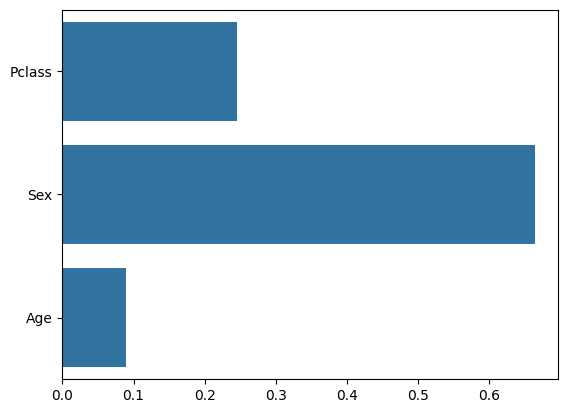

In [39]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("feature importance:{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(['Pclass' , 'Sex', 'Age'], dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

sns.barplot(x=dt_clf.feature_importances_, y=['Pclass' , 'Sex', 'Age'])